In [1]:
# Libraries
import numpy as np # numerical computation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [2]:
# Load and first view
path = 'data/data_email_campaign.csv' # path
df = pd.read_csv(path) # read data
df.head() # first view

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [3]:
# Data details
print('shape : ',df.shape)
print('# of duplicate rows : ',df.duplicated().sum())
print('columns : ',list(df.columns))
print()
print('Null count in each column :')
print(df.isna().sum())
print()
print('Unique count in each column :')
print(df.nunique())

shape :  (68353, 12)
# of duplicate rows :  0
columns :  ['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']

Null count in each column :
Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Unique count in each column :
Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total

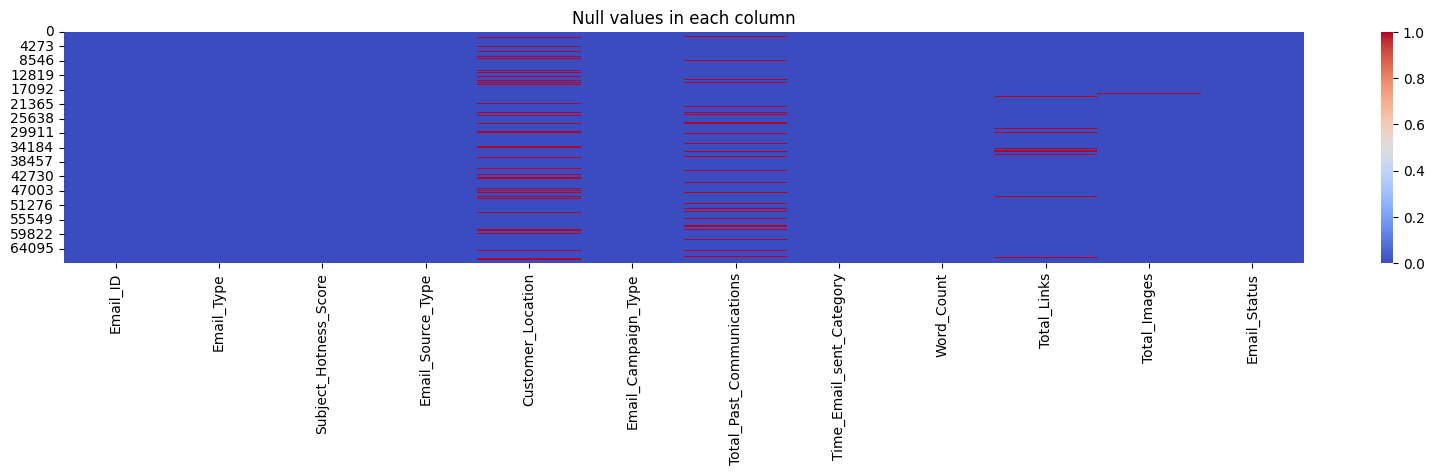

In [4]:
plt.figure(figsize=(20,3))
sns.heatmap(df.isna(), cmap='coolwarm')
plt.title('Null values in each column')
plt.show()

In [5]:
# Unique values
for col in df.columns[1:]:
    print('Unique values in column :',col)
    print(list(df[col].unique()))
    print()

Unique values in column : Email_Type
[np.int64(1), np.int64(2)]

Unique values in column : Subject_Hotness_Score
[np.float64(2.2), np.float64(2.1), np.float64(0.1), np.float64(3.0), np.float64(0.0), np.float64(1.5), np.float64(3.2), np.float64(0.7), np.float64(2.0), np.float64(0.5), np.float64(0.2), np.float64(1.0), np.float64(4.0), np.float64(1.9), np.float64(1.1), np.float64(1.6), np.float64(0.3), np.float64(2.3), np.float64(1.4), np.float64(1.7), np.float64(2.8), np.float64(1.2), np.float64(0.8), np.float64(0.6), np.float64(4.2), np.float64(1.8), np.float64(2.4), np.float64(0.9), np.float64(1.3), np.float64(3.3), np.float64(2.6), np.float64(3.1), np.float64(4.1), np.float64(2.9), np.float64(2.7), np.float64(0.4), np.float64(3.5), np.float64(3.7), np.float64(2.5), np.float64(3.8), np.float64(3.9), np.float64(3.4), np.float64(4.6), np.float64(4.5), np.float64(3.6), np.float64(4.4), np.float64(4.7), np.float64(5.0), np.float64(4.3), np.float64(4.8), np.float64(4.9)]

Unique values in c